We import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

Task 1

We create the SIRD model as well as analysis function

In [73]:
def sird_model(y, t, beta, gamma, mu):
    S, I, R, D = y 
    N = S + I + R + D
    dSdt = -beta*(S*I/N)
    dIdt = beta*(S*I/N) - gamma * I - mu * I
    dRdt = gamma*I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt
plot_data = []
df_data = []
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    
    tSIRD=[[],[],[],[],[]]
    data_list=[[],[],[],[],[]]
    gammas = [0.05, 0.1, 0.15, 0.2, 0.25]
    for gamma in gammas:
        S0 = N - I0
        R0 = 0
        D0 = 0
        y0 = [S0, I0, R0, D0]
        t = np.linspace(0, simulation_days, simulation_days)
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S, I, R, D = sol.T
        tSIRD[0].append(t)
        tSIRD[1].append(S)
        tSIRD[2].append(R)
        tSIRD[3].append(I)
        tSIRD[4].append(D)
        peak_infected=max(I)
        peak_day=np.argmax(I)
        total_deaths=D[-1]
        rep_number=beta/gamma
        data_list[0].append(gamma)
        data_list[1].append(peak_infected)
        data_list[2].append(peak_day)
        data_list[3].append(total_deaths)
        data_list[4].append(rep_number)
    data = {}
    data["gamma"] = data_list[0]
    data["peak_infected"] = data_list[1]
    data["peak_day"] = data_list[2]
    data["total_deaths"] = data_list[3]
    data["rep_number"] = data_list[4]
    df = pd.DataFrame(data)
    df_data.append(df)
    plot_data.append(tSIRD)
    return df


Task 2

We run the analysis on the given scenarios, we plot them side by side as well as display the data frames. Then we give the analysis on which scenario could be considered worse

   gamma  peak_infected  peak_day  total_deaths  rep_number
0   0.05     520.757922        21    284.757434    8.000000
1   0.10     340.259908        22    159.892366    4.000000
2   0.15     213.467271        24    102.610885    2.666667
3   0.20     123.830763        27     67.423926    2.000000
4   0.25      63.070351        30     42.694003    1.600000
   gamma  peak_infected  peak_day  total_deaths  rep_number
0   0.05     371.304875        44     88.225824    4.000000
1   0.10     139.343938        52     36.700237    2.000000
2   0.15      31.343160        67     13.642779    1.333333
3   0.20       5.000000         0      1.832013    1.000000
4   0.25       5.000000         0      0.433167    0.800000


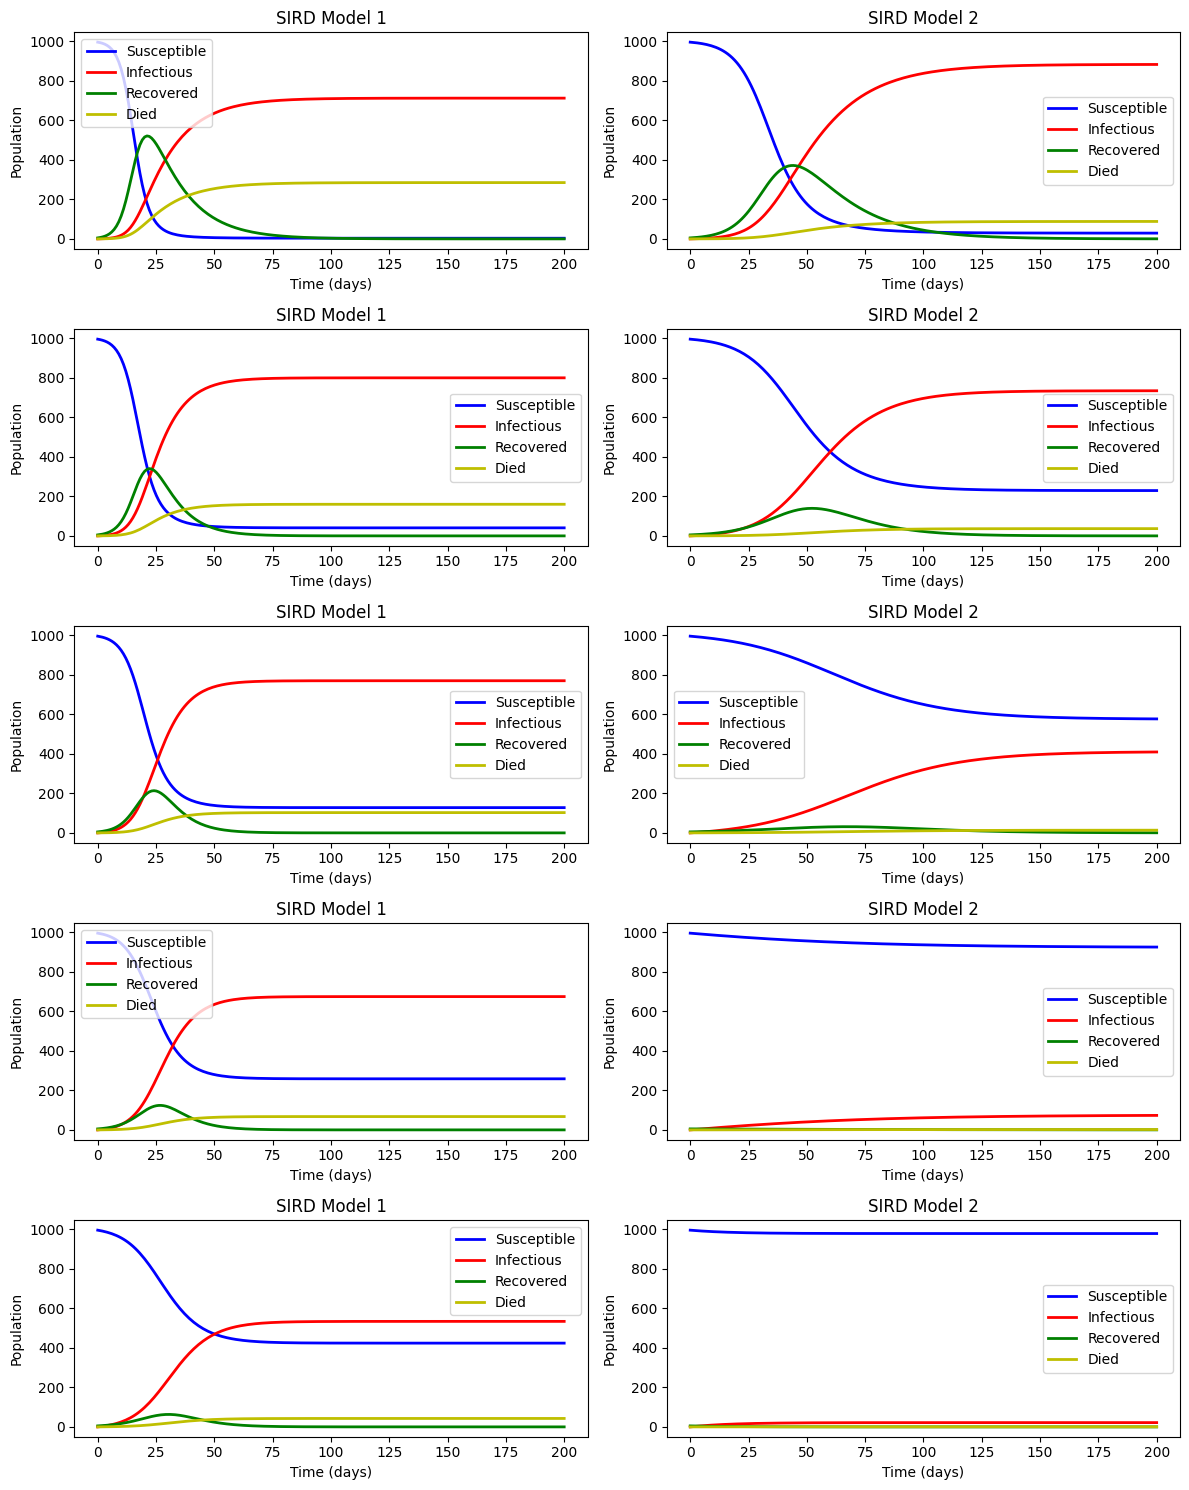

In [76]:
plot_data.clear()
df_data.clear()
fig, axes = plt.subplots(5, 2,figsize=(12, 15))
analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)
analyze_recovery_rates(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)
for df in df_data:
    print(df)
for i in range(5):
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][1][i], 'b-', label='Susceptible', linewidth=2)
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][2][i], 'r-', label='Infectious', linewidth=2)
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][3][i], 'g-', label='Recovered', linewidth=2)
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][4][i], 'y-', label='Died', linewidth=2)
    axes[i][0].set_title(f'SIRD Model 1')
    axes[i][0].set_xlabel('Time (days)')
    axes[i][0].set_ylabel('Population')
    axes[i][0].legend()
for i in range(5):
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][1][i], 'b-', label='Susceptible', linewidth=2)
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][2][i], 'r-', label='Infectious', linewidth=2)
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][3][i], 'g-', label='Recovered', linewidth=2)
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][4][i], 'y-', label='Died', linewidth=2)
    axes[i][1].set_title(f'SIRD Model 2')
    axes[i][1].set_xlabel('Time (days)')
    axes[i][1].set_ylabel('Population')
    axes[i][1].legend()
plt.tight_layout()
plt.show()

# Scenario A the high transmission scenario could be considered in many aspects the worse scenario.

# Why is this?

## 1. Amount of total deaths:
The amount of total deaths in the high transmission scenario is significantly higher than in scenario B aka the low transmission scenario.
Proportionally, in the instance where the two scenarios have the lowest difference in death count which is when gamma is 0.05, scenario A has 3 times as many deaths as scenario B with them having 284 and 88 deaths respectively. The situation is even worse when we consider the instance when these scenarios have the highest difference, in this situation scenario A has infinitely more deaths than scenario B with them having 42 and 0 deaths respectively.

## 2. Peak infections:
In the same vein as with the total deaths, the high transmission scenario is considerably worse than the low transmission scenario. In the instance when proportionally they have the lowest difference of infected when gamma is 0.05 the high transmission scenario still has 1.4 times as many infected then the low transmission scenario with them having 520 and 371 infected respectively. The situation is considerably worse when gamma is 0.2 as this instance has the highest difference of amount of infected proportionally with the high infection scenario having 24.6 times as many infected as the low transmission scenario with them having 123 and 5 infected respectively.
## 3. Peak infection days:
In this regard, the results are mixed as the low transmission rate scenario has consistently higher peak infection days, thus length of pandemics. However, from gamma 0.2 onwards the recovery rate is equal and or greater than the transmission rate, thus peak days are consistently 0 and a pandemic never arises. The same could have been said for the high transmission situation if we were to look at recovery rates of 0.4 and higher, however in this analysis we only consider recovery rates from 0.05 to 0.25.

# Part 3.1

## 1. How does increasing recovery rate affect peak infections?:
We can see that in both scenarios that as the recovery rate increased, peak infections also decreased. For example, in scenario A we had the following data:

| gamma | peak infections |
|---|---|
| 0.05 | 520 |
| 0.1 | 340 |
| 0.15 | 213 |
| 0.2 | 123 |
| 0.25 | 63 |

We can see from this, as the recovery rate increased, the peak infections decreased. A similar trend can be seen in scenario B with the following data:

| gamma | peak infections |
|---|---|
| 0.05 | 371 |
| 0.1 | 139 |
| 0.15 | 31 |
| 0.2 | 5 |
| 0.25 | 5 |

We can see from this data the scenario B has the same trend of peak infections decreasing as recovery rates increase. At least up until gamma = 2 when the peak infections plateau to 5 this is because at this point and further on the rate of recovery becomes equal or greater than the infection rate, thus the initial 5 people either recover or die before they can go on and infect other people.

## 2. How does increasing recovery rate affect total deaths?:
We can see a similar trend that we saw in the peak infections in both scenario A and B where the total amount of deaths decreases with the increase in the recovery rate. Scenario A:

| Gamma | Total Deaths |
|-------|--------------|
| 0.05 | 284 |
| 0.1 | 159 |
| 0.15 | 102 |
| 0.2 | 67 |
| 0.25 | 42 |

Scenario B:

| Gamma | Total Deaths |
|---|---|
| 0.05 | 88 |
| 0.1 | 36 |
| 0.15 | 13 |
| 0.2 | 1 |
| 0.25 | 0 |

## 3. How does increasing recovery rate affect epidemic duration?:
We can see from the data in scenario A that increasing the recovery rate also increases the peak infection day which is a metric that is closely related to the epidemic duration, meaning that increasing the recovery rate prolongs the epidemic. Data from scenario A:

| Gamma | Peak Infection Day |
|---|---|
| 0.05 | 21 |
| 0.1 | 22 |
| 0.15 | 24 |
| 0.2 | 27 |
| 0.25 | 30 |

From this data, we can see that there is a positive correlation between recovery rates and peak infection days. Now lets investigate scenario B:

| Gamma | Peak Infection Day |
|---|---|
| 0.05 | 44 |
| 0.1 | 52 |
| 0.15 | 67 |
| 0.2 | 0 |
| 0.25 | 0 |

We can see from this data that the positive correlation between recovery rates and peak infection days is the same as within scenario A up until gamma = 0.2. When suddenly, the peak infection day decreases to 0 and does not increase any further. This is because at gamma = 0.2 the recovery rate from now on is equal to or greater than the infection rate. When this happens, all the initial infected either recover or die before they can infect anyone. Thus no epidemic can form.

# Part 3.2

## If an intervention could increase recovery rate by 50%, what would be the expected impact on total deaths?

For this task we will take scenario A as basis, and we will modify our analysis to reflect the 50% increase in recovery rates for every gamma

In [77]:
def analyze_recovery_rates_modified(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    
    tSIRD=[[],[],[],[],[]]
    data_list=[[],[],[],[],[]]
    gammas = [0.05, 0.1, 0.15, 0.2, 0.25]
    for gamma in gammas:
        S0 = N - I0
        R0 = 0
        D0 = 0
        y0 = [S0, I0, R0, D0]
        t = np.linspace(0, simulation_days, simulation_days)
        sol = odeint(sird_model, y0, t, args=(beta, gamma*1.5, mu))
        S, I, R, D = sol.T
        tSIRD[0].append(t)
        tSIRD[1].append(S)
        tSIRD[2].append(R)
        tSIRD[3].append(I)
        tSIRD[4].append(D)
        peak_infected=max(I)
        peak_day=np.argmax(I)
        total_deaths=D[-1]
        rep_number=beta/gamma
        data_list[0].append(gamma)
        data_list[1].append(peak_infected)
        data_list[2].append(peak_day)
        data_list[3].append(total_deaths)
        data_list[4].append(rep_number)
    data = {}
    data["gamma"] = data_list[0]
    data["peak_infected"] = data_list[1]
    data["peak_day"] = data_list[2]
    data["total_deaths"] = data_list[3]
    data["rep_number"] = data_list[4]
    df = pd.DataFrame(data)
    df_data.append(df)
    plot_data.append(tSIRD)
    return df


   gamma  peak_infected  peak_day  total_deaths  rep_number
0   0.05     520.757922        21    284.757434    8.000000
1   0.10     340.259908        22    159.892366    4.000000
2   0.15     213.467271        24    102.610885    2.666667
3   0.20     123.830763        27     67.423926    2.000000
4   0.25      63.070351        30     42.694003    1.600000
   gamma  peak_infected  peak_day  total_deaths  rep_number
0   0.05     421.526796        22    207.204490    8.000000
1   0.10     213.467271        24    102.610885    4.000000
2   0.15      90.289089        28     54.109547    2.666667
3   0.20      25.493304        34     24.083890    2.000000
4   0.25       5.028212         4      5.505229    1.600000


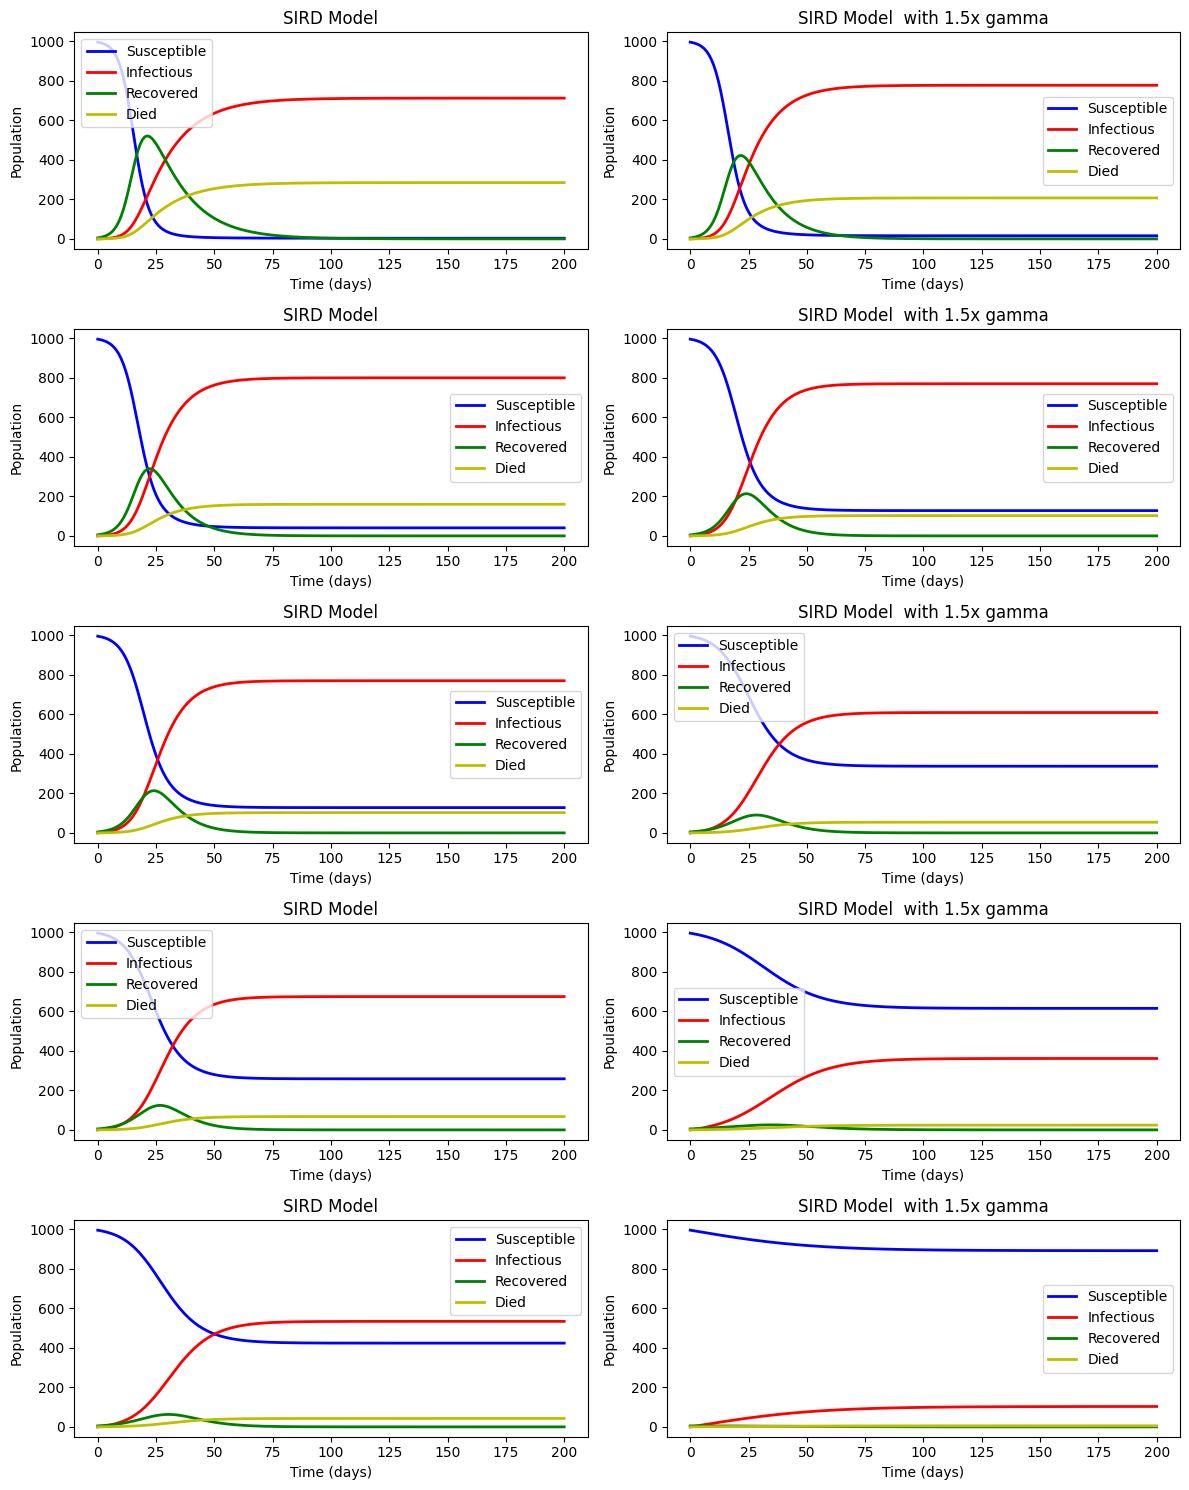

In [82]:
plot_data.clear()
df_data.clear()
fig, axes = plt.subplots(5, 2,figsize=(12, 15))
analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)
analyze_recovery_rates_modified(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)
for df in df_data:
    print(df)
for i in range(5):
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][1][i], 'b-', label='Susceptible', linewidth=2)
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][2][i], 'r-', label='Infectious', linewidth=2)
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][3][i], 'g-', label='Recovered', linewidth=2)
    axes[i][0].plot(plot_data[0][0][i], plot_data[0][4][i], 'y-', label='Died', linewidth=2)
    axes[i][0].set_title(f'SIRD Model')
    axes[i][0].set_xlabel('Time (days)')
    axes[i][0].set_ylabel('Population')
    axes[i][0].legend()
for i in range(5):
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][1][i], 'b-', label='Susceptible', linewidth=2)
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][2][i], 'r-', label='Infectious', linewidth=2)
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][3][i], 'g-', label='Recovered', linewidth=2)
    axes[i][1].plot(plot_data[1][0][i], plot_data[1][4][i], 'y-', label='Died', linewidth=2)
    axes[i][1].set_title(f'SIRD Model  with 1.5x gamma')
    axes[i][1].set_xlabel('Time (days)')
    axes[i][1].set_ylabel('Population')
    axes[i][1].legend()
plt.tight_layout()
plt.show()

By comparing the data from our modified analysis and our base analysis, we can see that a 50% increase in recovery rates significantly decreases the deaths at every gamma point.
| gamma | total deaths in base analysis | total deaths in modified analysis | ratio (base/modified) |
|---|---|---|---|
| 0.05 | 284 | 207 | ~ 1.37 |
| 0.1 | 159 | 102 | ~ 1.55 |
| 0.15 | 102 | 54 | ~ 1.88 |
| 0.2 | 67 | 24 | ~ 2.79 |
| 0.25 | 42 | 5 | 8.4 |


# Part 3.3

## Name one real medical intervention that could increase recovery rates
